In [123]:
import matplotlib.pyplot as plt
import random
import numpy as np
from cmath import nan
import warnings


In [124]:
class Node:
    def __init__(self, num, transmitStatus = False, numOfPackets = 1):
        self.num = num
        self.transmitStatus = transmitStatus
        self.numOfPackets = numOfPackets


In [125]:
def RandomStatus(numOfNodes):
    if random.randint(1,numOfNodes) == 1:
        return True
    return False

In [126]:
n1 = []
n2 = []
n3 = []
array_list = [n1,n2,n3]
Empty = []
Collision = []
Success = []
efficiency = []
listOfNodes = []
numOfNodes = 3
NumOfSlots = 10

for i in range(numOfNodes):
    listOfNodes.append( Node(i+1))
for i in range(NumOfSlots):
    NumTrue = 0
    for node in listOfNodes:
        if(node.numOfPackets!=0):
            node.transmitStatus = RandomStatus(numOfNodes)
        #print(node.transmitStatus)
        if(node.transmitStatus):
            #print("success", node.num)
            array_list[node.num - 1].append(node.num)
            NumTrue+=1
        else:
            array_list[node.num - 1].append(nan)            
    if(NumTrue==0):
        Empty.append(0.5)
        Collision.append(nan)
        Success.append(nan)
    elif(NumTrue==1):
        for node in listOfNodes:
            if(node.transmitStatus==True):
                node.numOfPackets-=1
                node.transmitStatus=False
        Empty.append(nan)
        Collision.append(nan)
        Success.append(0.5)
    else:
        Empty.append(nan)
        Collision.append(0.5)
        Success.append(nan)

In [127]:
for node in array_list:
    print(node)
print("Empty",Empty)
print("Collision",Collision)
print("Success",Success)

[1, nan, 1, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, 2, nan, 2, nan, nan, nan]
[3, nan, nan, nan, 3, 3, nan, nan, nan, nan]
Empty [nan, 0.5, nan, 0.5, nan, nan, nan, 0.5, 0.5, 0.5]
Collision [0.5, nan, nan, nan, 0.5, nan, nan, nan, nan, nan]
Success [nan, nan, 0.5, nan, nan, 0.5, 0.5, nan, nan, nan]


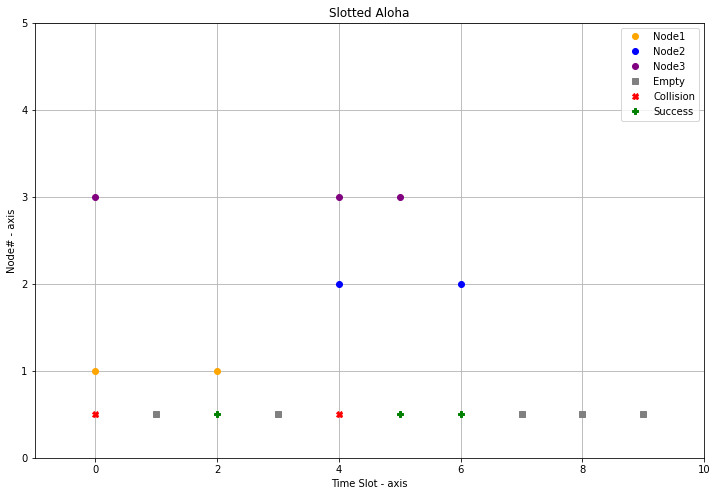

In [128]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 8))
# plotting the points 
plt.plot(n1,"ob",color='orange', label="Node1")
plt.plot(n2, "ob", color='blue', label="Node2")
plt.plot(n3, "ob", color='purple', label="Node3")
plt.plot(Empty, "ob", color='grey',marker='s', label="Empty")
plt.plot(Collision, "ob", color='red', marker='X', label="Collision")
plt.plot(Success, "ob", color='green', marker='P', label="Success")

# naming the x axis
plt.xlabel('Time Slot - axis')
# naming the y axis
plt.ylabel('Node# - axis')

plt.axis([-1, 10, 0, 5])

plt.title('Slotted Aloha')
plt.grid() 


plt.legend()
plt.show()
